### Analysis of XYZ supermarket Dataset Across the Country
Analyzing 3 months sales information dataset of company XYZ supermarket gathered from its major branches located in 3 cities across the country. This analysis is to help the company to understand sales trend and it's growth as the rise of supermarkets competition is seen.

### Loading the Dataset
Combining the dataset from the 3 branches into one dataset for easy analysis. This is done by using `glob` to read multiple files from the current working directory and combining it to a CSV file.

###### Importing libraries

In [ ]:
import pandas as pd
from glob import glob

###### Using `glob` to match the pattern "csv"

In [ ]:
# Reading the csv files from the current working directory
extension = 'csv'
files = [each_file for each_file in glob('*.{}'.format(extension))]
print(files)

['Abuja_Branch.csv', 'Port_Harcourt_Branch.csv', 'Lagos_Branch.csv', 'dataset.csv']


###### Combining all the files in the generated list above and exporting to CSV

In [ ]:
df = [pd.read_csv(file) for file in files]

In [ ]:
data = pd.concat(df, ignore_index=True)

In [ ]:
data.sort_values('Branch', ignore_index=True, inplace=True)

In [ ]:
data.to_csv("dataset.csv", index=False)

###### Reading the csv file using `pd.read_csv` method

In [ ]:
dataset = pd.read_csv("dataset.csv")

### Data Exploration
Exploring the loaded dataset using some built-in Pandas function

###### Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

###### Using `.head` method to view the first few rows of the dataset

In [ ]:
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,849-09-3807,A,Lagos,Member,Female,Fashion accessories,31802.4,7,11130.84,233747.64,2/18/2019,13:28,Cash,222616.8,4.761905,11130.84,6.6
1,252-56-2699,A,Lagos,Normal,Male,Food and beverages,15548.4,10,7774.20,163258.20,2/7/2019,16:48,Epay,155484.0,4.761905,7774.20,8.2
2,829-34-3910,A,Lagos,Normal,Female,Health and beauty,25696.8,10,12848.40,269816.40,3/29/2019,19:21,Cash,256968.0,4.761905,12848.40,5.7
3,656-95-9349,A,Lagos,Member,Female,Health and beauty,24814.8,7,8685.18,182388.78,3/11/2019,11:03,Card,173703.6,4.761905,8685.18,4.6
4,765-26-6951,A,Lagos,Normal,Male,Sports and travel,26139.6,6,7841.88,164679.48,1/1/2019,10:39,Card,156837.6,4.761905,7841.88,6.9


In [ ]:
# Using .tail mathod to check the last few rows of the dataset for comformity
dataset.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1995,174-36-3675,C,Port Harcourt,Member,Male,Food and beverages,35773.2,2,3577.32,75123.72,2/14/2019,17:29,Cash,71546.4,4.761905,3577.32,5.2
1996,227-07-4446,C,Port Harcourt,Member,Female,Electronic accessories,28126.8,10,14063.40,295331.40,2/10/2019,20:51,Cash,281268.0,4.761905,14063.40,4.4
1997,181-94-6432,C,Port Harcourt,Member,Male,Fashion accessories,24958.8,2,2495.88,52413.48,2/5/2019,19:05,Epay,49917.6,4.761905,2495.88,9.7
1998,446-47-6729,C,Port Harcourt,Normal,Male,Fashion accessories,35935.2,2,3593.52,75463.92,1/2/2019,18:09,Card,71870.4,4.761905,3593.52,6.7
1999,598-47-9715,C,Port Harcourt,Normal,Male,Electronic accessories,30265.2,4,6053.04,127113.84,3/7/2019,16:54,Epay,121060.8,4.761905,6053.04,4.4


###### Using `.shape` attribute to check the number of rows and columns present in the data.

In [ ]:
dataset.shape

(2000, 17)

The dataset has 1000 rows and 17 columns

###### Generating the column names using the `columns` attribute.

In [ ]:
dataset.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

###### Viewing the statistical summary of the dataset using describe method

In [ ]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2.000000e+03,2000.00000,2000.00000
mean,20041.966800,5.510000,5536.57284,116268.029640,110731.456800,4.761905e+00,5536.57284,6.97270
std,9535.680197,2.922699,4214.12272,88496.577116,84282.454396,5.375007e-14,4214.12272,1.71815
min,3628.800000,1.000000,183.06000,3844.260000,3661.200000,4.761905e+00,183.06000,4.00000
25%,11835.000000,3.000000,2132.95500,44792.055000,42659.100000,4.761905e+00,2132.95500,5.50000
50%,19882.800000,5.000000,4351.68000,91385.280000,87033.600000,4.761905e+00,4351.68000,7.00000
75%,28056.600000,8.000000,8080.29000,169686.090000,161605.800000,4.761905e+00,8080.29000,8.50000
max,35985.600000,10.000000,17874.00000,375354.000000,357480.000000,4.761905e+00,17874.00000,10.00000


     From the statistical summary above, it is shown that the average unit price of goods is ₦20,041.97 with the minimum unit price of ₦3,628.80 and maximum unit price of ₦35,985.60.
    The average quantity of the goods sold is 5.5 with minimum quantity of 1 and maximum quantity of 10.
    The average cost of goods sold is ₦110,731.46 with minimum of cost of ₦3,661.20 and maximum of ₦357,480.00.
    The average gross income is ₦5,536.57 with the minimum of ₦183.06 and maximum of ₦17,874.00.
    The average customer rating is 6.97 with minimum of 4 and maximum of 10.

###### Checking for missing Values

In [ ]:
dataset.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
dataset.notna().sum()

Invoice ID                 2000
Branch                     2000
City                       2000
Customer type              2000
Gender                     2000
Product line               2000
Unit price                 2000
Quantity                   2000
Tax 5%                     2000
Total                      2000
Date                       2000
Time                       2000
Payment                    2000
cogs                       2000
gross margin percentage    2000
gross income               2000
Rating                     2000
dtype: int64

###### Checking the Data Information
    By using info() method the concise summary of a DataFrame can be checked. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               2000 non-null   object 
 1   Branch                   2000 non-null   object 
 2   City                     2000 non-null   object 
 3   Customer type            2000 non-null   object 
 4   Gender                   2000 non-null   object 
 5   Product line             2000 non-null   object 
 6   Unit price               2000 non-null   float64
 7   Quantity                 2000 non-null   int64  
 8   Tax 5%                   2000 non-null   float64
 9   Total                    2000 non-null   float64
 10  Date                     2000 non-null   object 
 11  Time                     2000 non-null   object 
 12  Payment                  2000 non-null   object 
 13  cogs                     2000 non-null   float64
 14  gross margin percentage 

The Dataset contains `float64`, `int64` and `object` datatype

### Dealing with DateTime Features¶

###### Converting Date and Time to the appropriate datetype using `to_datetime` method

In [ ]:
# Converting date to the appropriate datatype
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
# Confirming the datatype
dataset['Date'].dtype

dtype('<M8[ns]')

In [ ]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [ ]:
# Converting Time to the appropriate datatype
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [ ]:
# Confirming the datatype
dataset['Time'].dtype

dtype('<M8[ns]')

### Extracting Features from date & time

In [ ]:
import datetime as dt

In [ ]:
# Extracting Day feature from the Date column and saving it to a new "Day" column
dataset['Day'] = dataset['Date'].dt.day

In [ ]:
# Extracting Month feature from the Date column and saving it to a new "Month" column
dataset['Month'] = dataset['Date'].dt.month

In [ ]:
# Extracting Year feature from the Date column and saving it to a new "Year" column
dataset['Year'] = dataset['Date'].dt.year

In [ ]:
# Extracting the Hour feature from the Time column saving it to a new "Hour" column
dataset['Hour'] = dataset['Time'].dt.hour

###### Gettting the unique hours of sales using `nunique()` and `unique()` method

In [ ]:
dataset['Hour'].nunique()

11

In [ ]:
np.sort(dataset['Hour'].unique())

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### Unique values in Columns

In [ ]:
# Getting the categorical columns in the dataset
categorical_columns = [col for col in dataset.columns if dataset[col].dtype == 'object']
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

###### Generating the unique values in the categoriacal columns

In [ ]:
print("Total Number of unique values in the Invoice ID Column : {}". format(
    len(dataset['Invoice ID'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000


In [ ]:
# Unique Values for Branch column
dataset['Branch'].unique().tolist()

['A', 'B', 'C']

In [ ]:
print("Total Number of unique values in the Branch Column : {}". format(
    len(dataset['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [ ]:
# Unique values for City column
dataset['City'].unique().tolist()

['Lagos', 'Abuja', 'Port Harcourt']

In [ ]:
print("Total Number of unique values in the City Column : {}". format(
    len(dataset['City'].unique().tolist())))

Total Number of unique values in the City Column : 3


In [ ]:
# Unique values for Customer type column
dataset['Customer type'].unique().tolist()

['Member', 'Normal']

In [ ]:
print("Total Number of unique values in the Customer type Column : {}". format(
    len(dataset['Customer type'].unique().tolist())))

Total Number of unique values in the Customer type Column : 2


In [ ]:
# Unique Values for Gender column
dataset['Gender'].unique().tolist()

['Female', 'Male']

In [ ]:
print("Total Number of unique values in the Gender Column : {}". format(
    len(dataset['Gender'].unique().tolist())))

Total Number of unique values in the Gender Column : 2


In [ ]:
# Unique Values for Product line column
dataset['Product line'].unique().tolist()

['Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Sports and travel',
 'Electronic accessories',
 'Home and lifestyle']

In [ ]:
print("Total Number of unique values in the Product line Column : {}". format(
    len(dataset['Product line'].unique().tolist())))

Total Number of unique values in the Product line Column : 6


In [ ]:
# Unique Values for Payment column
dataset['Payment'].unique().tolist()

['Cash', 'Epay', 'Card']

In [ ]:
print("Total Number of unique values in the Payment Column : {}". format(
    len(dataset['Payment'].unique().tolist())))

Total Number of unique values in the Payment Column : 3


###### Getting the count of the unique values of the categorical columns


In [ ]:
dataset['Invoice ID'].value_counts()

435-13-4908    2
468-99-7231    2
573-98-8548    2
574-57-9721    2
220-68-6701    2
              ..
286-75-7818    2
334-64-2006    2
512-91-0811    2
423-57-2993    2
528-14-9470    2
Name: Invoice ID, Length: 1000, dtype: int64

In [ ]:
dataset['Branch'].value_counts()

A    680
B    664
C    656
Name: Branch, dtype: int64

In [ ]:
dataset['City'].value_counts()

Lagos            680
Abuja            664
Port Harcourt    656
Name: City, dtype: int64

In [ ]:
dataset['Customer type'].value_counts()

Member    1002
Normal     998
Name: Customer type, dtype: int64

In [ ]:
dataset['Gender'].value_counts()

Female    1002
Male       998
Name: Gender, dtype: int64

In [ ]:
dataset['Product line'].value_counts()

Fashion accessories       356
Food and beverages        348
Electronic accessories    340
Sports and travel         332
Home and lifestyle        320
Health and beauty         304
Name: Product line, dtype: int64

In [ ]:
dataset['Payment'].value_counts()

Epay    690
Cash    688
Card    622
Name: Payment, dtype: int64

### Aggregation with Groupby

###### Grouping the dataset with the "City Column" and aggregation function of sum and mean. 

In [ ]:
city = dataset.groupby('City').agg(['sum','mean'])

In [ ]:
gross_sum = city['gross income']
gross_sum

,sum,mean
City,,
Abuja,3641063.04,5483.528675
Lagos,3641155.56,5354.640529
Port Harcourt,3790927.08,5778.852256


In [ ]:
# Highest total gross income
gross_sum[gross_sum['sum']==gross_sum['sum'].max()]

,sum,mean
City,,
Port Harcourt,3790927.08,5778.852256


    The city with the highest total gross income is Port Harcourt

In [ ]:
total_quantity = city['Quantity']
total_quantity

,sum,mean
City,,
Abuja,3640,5.481928
Lagos,3718,5.467647
Port Harcourt,3662,5.582317


In [ ]:
# Highest total quantity
total_quantity[total_quantity['sum'] == total_quantity['sum'].max()]

,sum,mean
City,,
Lagos,3718,5.467647


    lagos has the highest qunantity of goods sold

In [ ]:
total_unit_price = city['Unit price']
total_unit_price

,sum,mean
City,,
Abuja,13304793.6,20037.339759
Lagos,13410352.8,19721.107059
Port Harcourt,13368787.2,20379.248780


In [ ]:
# Highest total unit price
total_unit_price[total_unit_price['sum'] == total_unit_price['sum'].max()]

,sum,mean
City,,
Lagos,13410352.8,19721.107059


    Lagos has the highest total unit price

### Data Visualization

###### Determining the branch with the highest sale record

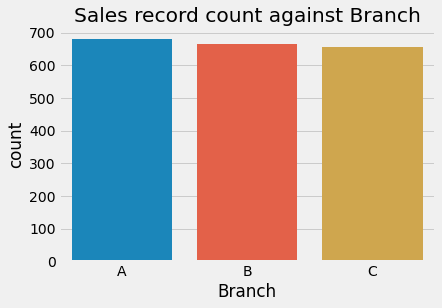

In [ ]:
sns.countplot(x='Branch', data=dataset).set_title("Sales record count against Branch")
plt.show()

"Branch A" has the highest sales record

###### Getting the most used payment method

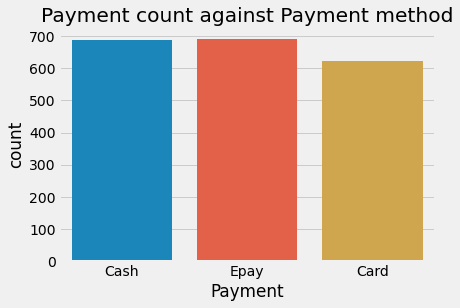

In [ ]:
sns.countplot(x='Payment', data=dataset).set_title("Payment count against Payment method")
plt.show()

"Epay" is the most used payment method

###### Getting the city with the most sales

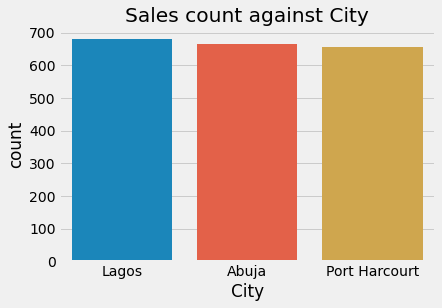

In [ ]:
sns.countplot(x='City', data=dataset).set_title('Sales count against City')
plt.show()

Lagos has the most sales

###### Getting the highest & lowest sold product line

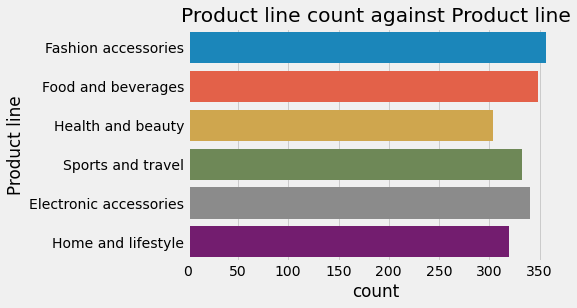

In [ ]:
sns.countplot(y='Product line', data=dataset).set_title('Product line count against Product line')
plt.show()

"Fashion accessories" is the highest sold product line while "Health and beauty" is the lowest sold product line

###### Determining the Payment channel used by most customer to pay for each product line`

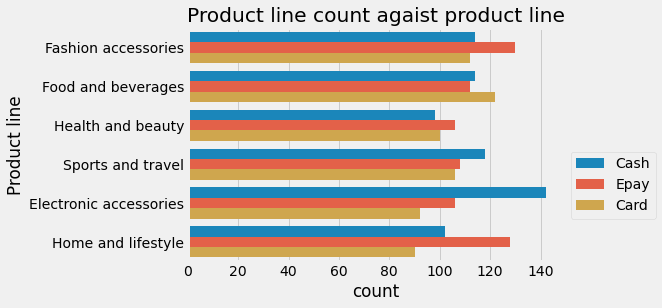

In [ ]:
sns.countplot(y='Product line', hue='Payment', data=dataset).set_title('Product line count agaist product line')
plt.legend(loc='best', bbox_to_anchor=(1,0.5))
plt.show()

For "electronics accessories" and "Sport and travel", the most used payment channel is cash, for "Fasion and accessories", "Health and Beauty" and "Home and Lifestyle", the most used payment channel is Epay and for "Food and beverages", the most used payment channel is Card.

###### Determining the payment channel for each branch

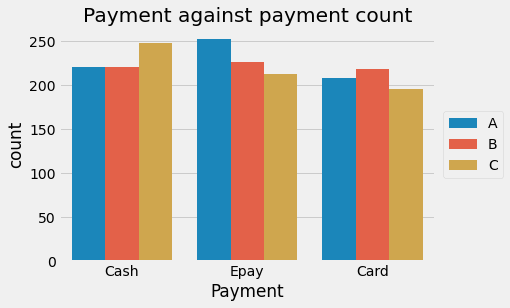

In [ ]:
sns.countplot(x='Payment', hue='Branch',data=dataset).set_title('Payment against payment count')
plt.legend(loc="center right", bbox_to_anchor=(1.2,0.5))
plt.show()

Branch C has cash as the most used payment channel, Branch A has Epay as the most used payment channel and branch B has card as the most used payment channel

###### Determining the branch with the lowest rating. 

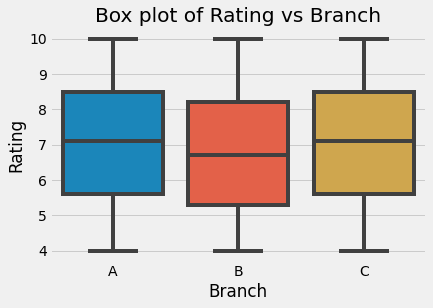

In [ ]:
sns.boxplot(x='Branch',y='Rating',data=dataset).set_title('Box plot of Rating vs Branch')
plt.show()

Branch B has the lowest rating

##### Effect of Gender type on Product line

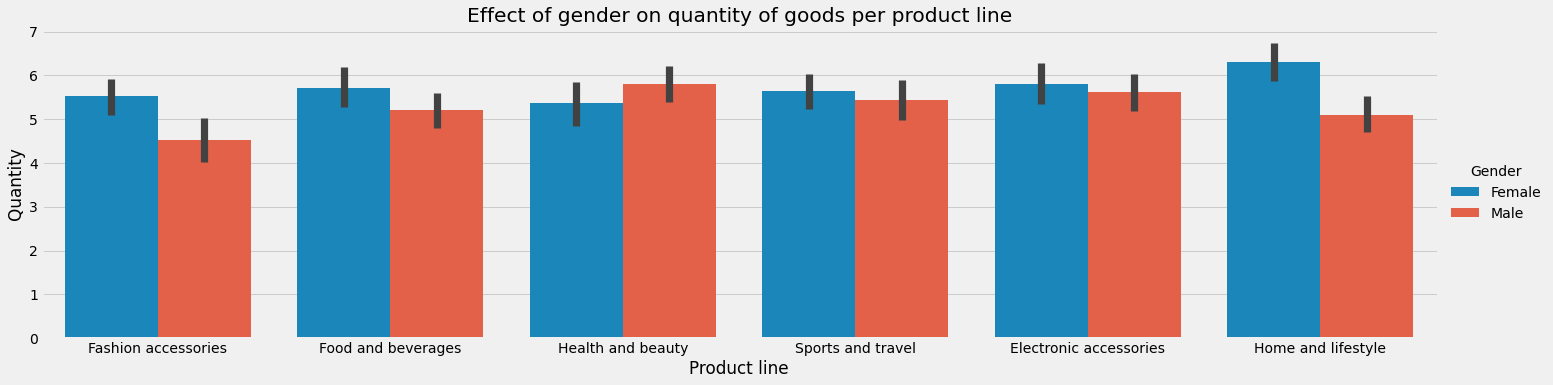

In [ ]:
sns.catplot(x='Product line',y='Quantity', hue='Gender', data=dataset, aspect=4, kind="bar")
plt.title("Effect of gender on quantity of goods per product line")
plt.show()

In [ ]:
dataset[['Product line', 'Quantity', 'Gender']].groupby(['Product line','Quantity']).Gender.value_counts().unstack()

Gender                           Female  Male
Product line           Quantity              
Electronic accessories 1             18    22
                       2              8     8
                       3             20    12
                       4             18    20
                       5             16    18
                       6             16    22
                       7              6    26
                       8             24    10
                       9             20    12
                       10            22    22
Fashion accessories    1             20    40
                       2             20    24
                       3             12    16
                       4             28    14
                       5             18    12
                       6             12     4
                       7             30    12
                       8             12    12
                       9             16    12
                       10            24    18
Food and beverages     1             14    16
                       2             10    22
                       3             26    20
                       4             22    14
                       5             26    16
                       6             14    20
                       7              4    20
                       8             14    16
                       9             26     8
                       10            24    16
Health and beauty      1             14    16
                       2             14    12
                       3             10    16
                       4              8    22
                       5             20    16
                       6             16    12
                       7             16    22
                       8              6    24
                       9             14    12
                       10            10    24
Home and lifestyle     1             10    16
                       2             12    16
                       3              6    20
                       4             16    28
                       5             12    14
                       6             24    18
                       7             16     8
                       8             18    16
                       9             20    16
                       10            24    10
Sports and travel      1             14    24
                       2             24    12
                       3              8    14
                       4             18    10
                       5             20    16
                       6             18    20
                       7             26    18
                       8             10     8
                       9             16    12
                       10            22    22

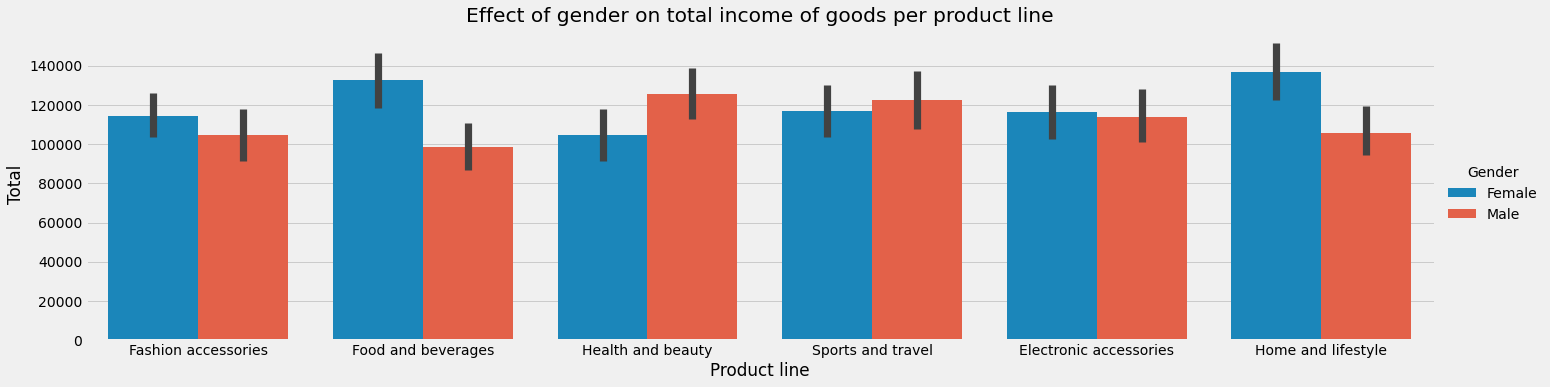

In [ ]:
sns.catplot(x='Product line',y='Total', hue='Gender', data=dataset, aspect=4, kind='bar')
plt.title("Effect of gender on total income of goods per product line")
plt.show()

Females have the higher purchase of Fasion accessories, Food and beverages & Home and lifestyle than male.
Also males have the higher purchase of Health and beauty.

Electronics accessories & Sport and travel sales among male and female are close although males have higher purchase of Electronic accessories than females and females also have higher puchase of Electronic accessories than female

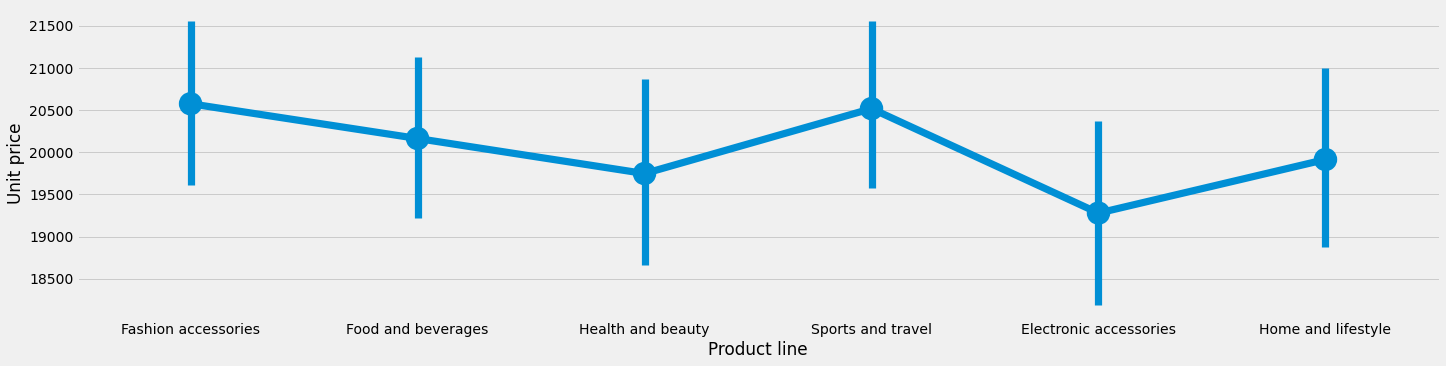

In [ ]:
sns.catplot(x='Product line', y='Unit price', data=dataset, kind='point',aspect=4)
plt.show()

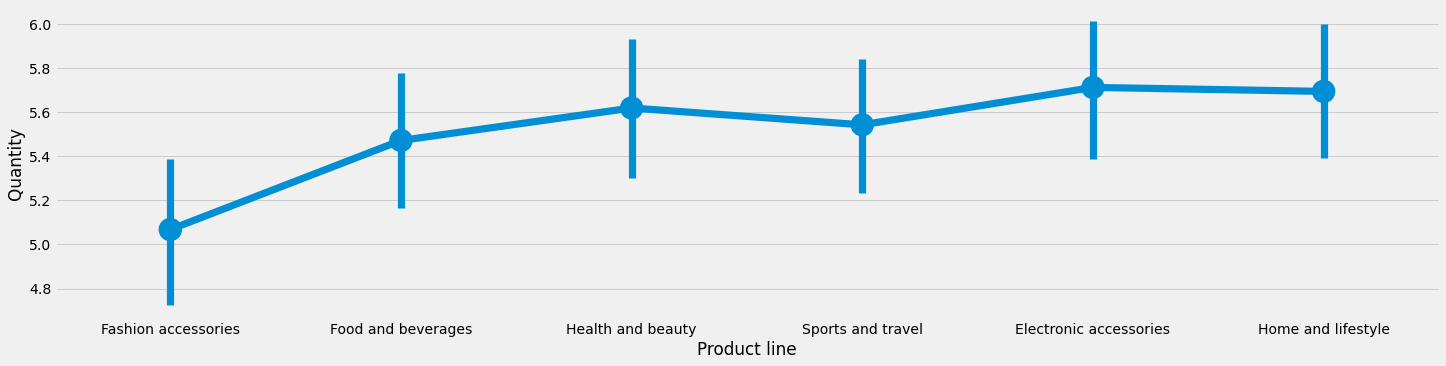

In [ ]:
sns.catplot(x='Product line', y='Quantity', data=dataset, kind='point', aspect=4)
plt.show()

- Electronic accessories has the lowest average unit price while Sports and travel has the highest average unit price
- Electronic accessories has the highest quantity purchased while Fasion acessories has the lowest quantity purchased

### Standout Section

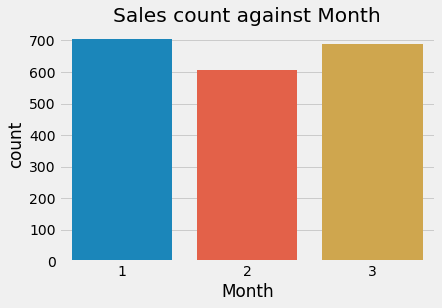

In [ ]:
# Getting the month with the most sals record across all the three branches
sns.countplot(x='Month', data=dataset).set_title("Sales count against Month")
plt.show()

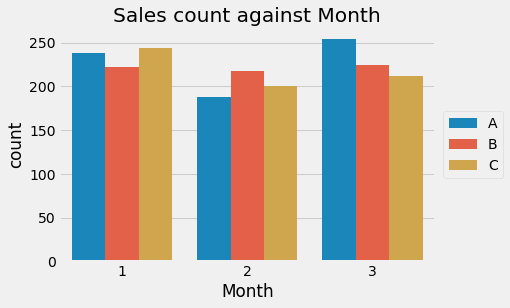

In [ ]:
# Getting the month with the most sales record for each branch
sns.countplot(x='Month',hue='Branch', data=dataset).set_title("Sales count against Month")
plt.legend(loc="center right", bbox_to_anchor=(1.2,0.5))
plt.show()

- The highest sales record appears in the first month. This is because all branches has high sales record especially branch C and A.
- The second month with a good sales record is month 3. In this month, Branch A has the highest sales across all records but the sales record in Branch C is low which brought down the rank of Month 3 on the list.
- Month 2 has the lowest sales record across the 3 months especially in Branch A.
- Having a close look into Branch B sales, all the records for the 3 months are close to each other

In [ ]:
# Getting the rating range from all branches
dataset['Rating Range'] = pd.cut(dataset['Rating'],[4,5,6,7,8,9,10],
       labels=['4-5','5-6','6-7','7-8','8-9','9-10'],include_lowest=True)

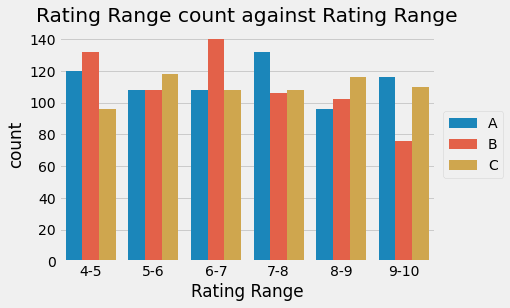

In [ ]:
sns.countplot(x='Rating Range',hue='Branch', data=dataset).set_title("Rating Range count against Rating Range")
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5))
plt.show()

The least rating from the cuatomer across all branches is 4. <br>
Branch A has its highest rating between 7-8, Branch B has its highest rating from 6-7 and branch C has its highest rating from 5-6.